# Laboratorio 2022-22

## Sesión 13: Dinámica de poblaciones: matrices de Markov ##

**Ejercicio 1.** En la lectura previa a esta sesión hemos visto un criterio para saber si una matriz estocástica dada es o no regular.

**Teorema.** _Una matriz estocástica $M$ de orden $n$ es regular si y solo si todos los elementos de $M^{n^2}$ son positivos_

En particular, para ver si una matriz de Markov es o no regular basta con ir calculando potencias de $M$ hasta o bien llegar a una con todas sus entradas positivas, o bien alcanzar la potencia $n^2$ sin que esto ocurra, en cuyo caso $M$ será no regular. De hecho, mientras no busquemos la menor potencia que nos asegura que la matriz es regular, podemos _acelerar_ el cálculo considerando solo las potencias de la forma $2^k$, para lo que basta con tomar el cuadrado de la potencia previa de esta forma: $M^{2^k}=\big(M^{2^{k-1}}\big)^2$.

**a)** Codifica una función que dada una matriz estocástica decida si es o no regular utilizando el resultado previo y el cálculo acelerado. La función, digamos $\texttt{EsRegular}()$, recibirá una matriz estocástica y devolverá $\texttt{True}$ si es regular y $\texttt{False}$ en caso contrario. 

_Sugerencia_: dada una matriz $M$, $M\texttt{.nonzero}\_\texttt{positions}()$ devuelve una lista de pares $(i,j)$ que indican las posiciones en la matriz no nulas.

In [11]:
def es_regular(M):
    k=M.nrows()                    # Número de filas (que debe ser el mismo que el de columnas M.ncolumns())
    ceros=k^2-len(M.nonzero_positions())
    pasos=0
    while ceros>0 and 2^pasos<=k^2: # Sale del bucle cuando 2^pasos>k^2 ó cuando ya no hay ceros
        pasos+=1
        M=M^2                      # Vamos a ir calculando con M, M^2, (M^2)^2=M^4, (M^4)^2=M^8, etc...
        ceros=k^2-len(M.nonzero_positions())
    return ceros==0     

**b)** Comprueba con la función del apartado anterior si es regular la siguiente matriz y en caso afirmativo calcular la menor potencia de la matriz con todas sus entradas positivas.
$$\left(\begin{array}{rrrrrrrrr}
\frac{9}{10} & \frac{9}{10} & \frac{9}{10} & \frac{9}{10} & \frac{9}{10} & \frac{9}{10} & \frac{9}{10} & \frac{9}{10} & \frac{9}{10} \\
\frac{1}{10} & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 \\
0 & \frac{1}{10} & 0 & 0 & 0 & 0 & 0 & 0 & 0 \\
0 & 0 & \frac{1}{10} & 0 & 0 & 0 & 0 & 0 & 0 \\
0 & 0 & 0 & \frac{1}{10} & 0 & 0 & 0 & 0 & 0 \\
0 & 0 & 0 & 0 & \frac{1}{10} & 0 & 0 & 0 & 0 \\
0 & 0 & 0 & 0 & 0 & \frac{1}{10} & 0 & 0 & 0 \\
0 & 0 & 0 & 0 & 0 & 0 & \frac{1}{10} & 0 & 0 \\
0 & 0 & 0 & 0 & 0 & 0 & 0 & \frac{1}{10} & \frac{1}{10}
\end{array}\right)$$

In [13]:
M=matrix(QQ,9,[0]*81)
for j in [0..8]:
    M[0,j]=.9
    if j<8:
        M[j+1,j]=.1
M[8,8]=.1
show(M)
print(es_regular(M))
print(es_regular(matrix(QQ,2,[1,0,0,1])))

[9/10 9/10 9/10 9/10 9/10 9/10 9/10 9/10 9/10]
[1/10    0    0    0    0    0    0    0    0]
[   0 1/10    0    0    0    0    0    0    0]
[   0    0 1/10    0    0    0    0    0    0]
[   0    0    0 1/10    0    0    0    0    0]
[   0    0    0    0 1/10    0    0    0    0]
[   0    0    0    0    0 1/10    0    0    0]
[   0    0    0    0    0    0 1/10    0    0]
[   0    0    0    0    0    0    0 1/10 1/10]

True
False


In [20]:
# Repetir la función pero sin saltar en potencias de 2.
def menor_positivas(M):
    k=M.nrows()                    
    ceros=k^2-len(M.nonzero_positions())
    pasos=1
    M_nueva = M
    while ceros>0 and pasos<=k^2: 
        pasos+=1
        M_nueva = M_nueva*M
        ceros=k^2-len(M_nueva.nonzero_positions())
    return pasos    

menor_potencia = menor_positivas(M)
print(f"La menor potencia con todos los elementos positivos es: {menor_potencia}")
# show(M^7) Tiene ceros
show(M^8)

8


[       9/10        9/10        9/10        9/10        9/10        9/10        9/10        9/10        9/10]
[      9/100       9/100       9/100       9/100       9/100       9/100       9/100       9/100       9/100]
[     9/1000      9/1000      9/1000      9/1000      9/1000      9/1000      9/1000      9/1000      9/1000]
[    9/10000     9/10000     9/10000     9/10000     9/10000     9/10000     9/10000     9/10000     9/10000]
[   9/100000    9/100000    9/100000    9/100000    9/100000    9/100000    9/100000    9/100000    9/100000]
[  9/1000000   9/1000000   9/1000000   9/1000000   9/1000000   9/1000000   9/1000000   9/1000000   9/1000000]
[ 9/10000000  9/10000000  9/10000000  9/10000000  9/10000000  9/10000000  9/10000000  9/10000000  9/10000000]
[9/100000000 9/100000000 9/100000000 9/100000000 9/100000000 9/100000000 9/100000000 9/100000000 9/100000000]
[1/100000000 1/100000000 1/100000000 1/100000000 1/100000000 1/100000000 1/100000000 1/100000000 1/100000000]

**Ejercicio 2.** Estamos diseñando el sistema de ascensores de un rascacielos.

La empresa que los fabrica nos dice que cada día tendrán que parar, por avería o mantenimiento, el $10\%$ de los ascensores que estuviesen funcionando el día anterior, y que el $70\%$ de los ascensores que estén parados en un día dado volverán a estar operativos al día siguiente.

**a)**  Tras el periodo inicial de ajuste, ¿llegaremos a un régimen estable de funcionamiento de los ascensores? (*Sugerencia:* Estudiar la evolución del modelo matricial para este problema.)


[9/10 7/10]
[1/10 3/10]

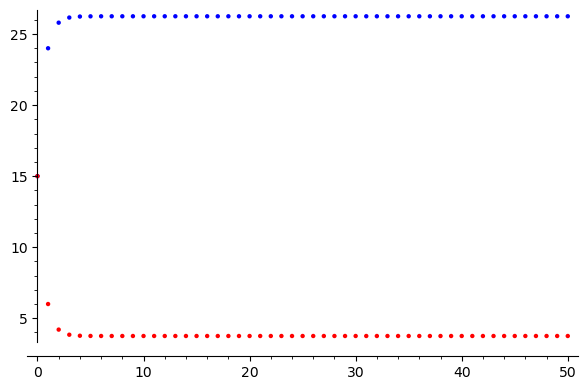

In [21]:
# X,Y=(Funcionan, no funcionan)
M=matrix(QQ,2,[0.9,0.7,0.1,0.3])
show(M)
DatIn=vector((15,15)) #Un posible dato inicial

#vamos a representar gráficamente lo que sucede en los primeros pasos, como hicimos en la sesión anterior
v=DatIn
X,Y=[(0,v[0])],[(0,v[1])]
for i in [1..50]:
    v=M*v
    X.append((i,v[0]))
    Y.append((i,v[1]))
show(points(X,color='blue')+points(Y,color='red'))

In [22]:
#Miramos lo que había en el último paso
show([N(X[-1][1]),N(Y[-1][1])])

[26.2500000000000, 3.75000000000000]

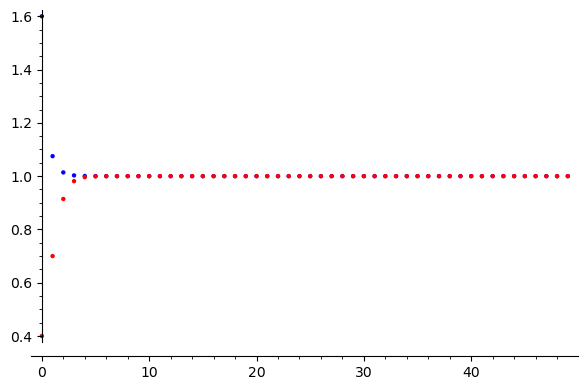

In [23]:
#Y ahora a ver los cocientes, para confirmar lo que sabemos sobre cómo evoluciona el crecimiento/decrecimiento
CX=[(i,X[i+1][1]/X[i][1]) for i in [0..49]]
CY=[(i,Y[i+1][1]/Y[i][1]) for i in [0..49]]
show(points(CX,color='blue')+points(CY,color='red'))

In [24]:
#Miramos el cociente en el último paso
show([N(CX[-1][1]),N(CY[-1][1])])

[1.00000000000000, 1.00000000000000]

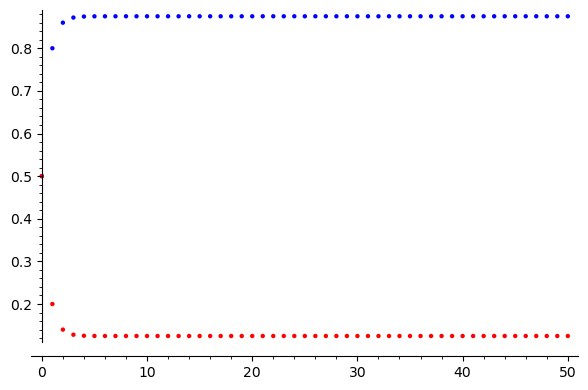

In [25]:
#Y ahora la proporción de cada tipo
TX=[(i,X[i][1]/(X[i][1]+Y[i][1])) for i in [0..50]]
TY=[(i,Y[i][1]/(X[i][1]+Y[i][1])) for i in [0..50]]
show(points(TX,color='blue')+points(TY,color='red'))

In [ ]:
#Miramos las proporciones en el último paso
show([N(TX[-1][1]),N(TY[-1][1])])

In [28]:
#Componentes del autovector de autovalor 1 normalizado
AutoVector1=vector((M-identity_matrix(2)).right_kernel().basis()[0]) # Obtenemos un vector propio asociado al autovalor 1
AutoVector1=AutoVector1/sum(AutoVector1)                             # Lo normalizamos 
show(AutoVector1)
print(f"{AutoVector1[0]} en funcionamiento")
print(f"{AutoVector1[1]} no funcionando")

(7/8, 1/8)

7/8 en funcionamiento
1/8 no funcionando


In [27]:
#Vamos a comparar con las proporciones de cada tipo, que hemos llamado TX, TY
#(TX[-1][1]-AutoVector1[0]).n(), (TY[-1][1]-AutoVector1[1]).n()
(vector((TX[-1][1],TY[-1][1]))-AutoVector1).n()

(-4.22212465065984e-36, 4.22212465065984e-36)

**b)** ¿Cuántos ascensores tendremos que instalar en el rascacielos si queremos que haya habitualmente 15 en condiciones de funcionar?

In [ ]:
# Como AutoVector1[0] da la proporción asintótica de ascensores que funcionan, para que funcionen 15 
# habitualmente basta tener

ceil(15/AutoVector1[0]) # ceil redondea hasta el próximo número entero.

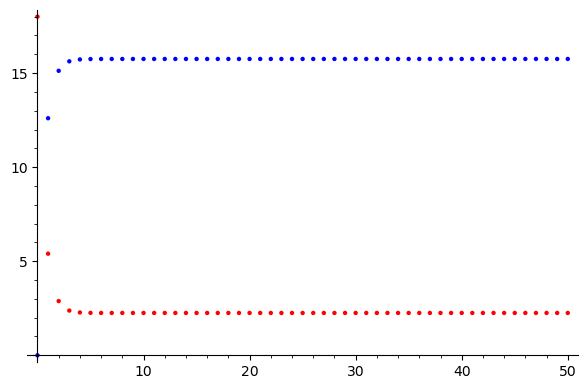

15.7500000000000

In [29]:
#Lo comprobamos
M=matrix(QQ,2,[0.9,0.7,0.1,0.3])
DatIn=vector((0,18)) #Cualquier reparto de los 18...

v=DatIn
X,Y=[(0,v[0])],[(0,v[1])]
for i in [1..50]:
    v=M*v
    X.append((i,v[0]))
    Y.append((i,v[1]))
show(points(X,color='blue')+points(Y,color='red'))
(X[-1][1]).n()

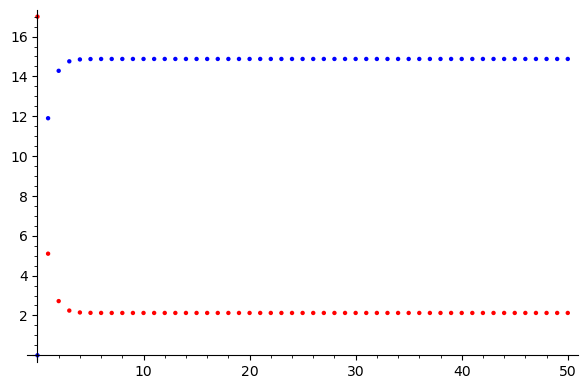

14.8750000000000

In [30]:
#Y con uno menos...
M=matrix(QQ,2,[0.9,0.7,0.1,0.3])
DatIn=vector((0,17)) #Cualquier reparto de los 18...

v=DatIn
X,Y=[(0,v[0])],[(0,v[1])]
for i in [1..50]:
    v=M*v
    X.append((i,v[0]))
    Y.append((i,v[1]))
show(points(X,color='blue')+points(Y,color='red'))
(X[-1][1]).n()

**Ejercicio 3.** _Otra matriz de Markov_

En una parcela dedicada a la explotación forestal, los árboles se clasifican según su tamaño en tres tipos: Pequeños, Medianos y Grandes. Cada periodo de 5 años, la evolución del bosque es la siguiente:

- El 20% de los árboles Pequeños no han crecido lo suficiente, y siguen siendo Pequeños. El 70% han pasado a la categoría de Medianos, y un 10% ha tenido un crecimiento excepcional que les hace pasar a la categoría de Grandes.

- El 10% de los árboles Medianos siguen siendo Medianos, y el 90% restante pasan a ser Grandes.

- Se tala el 80% de los árboles Grandes.

- Se plantan tantos árboles Pequeños como árboles Grandes han sido talados.

- Se considera que ningún árbol muere por ninguna otra causa que no sea la tala.

**Comentario:** Observa que como se plantan tantos árboles como son talados, el número total de árboles es constante en cada periodo de 5 años. Estamos de nuevo ante una matriz de Markov.

**a)** Denotando por $P_N, M_N, G_N $ el número de árboles en cada categoría en el _lustro_ $N$ (lustro = 5 años), formula matricialmente el sistema y estudia su evolución a largo plazo, para determinar qué porcentaje de árboles se espera que estén en cada una de las categorías.</p>


In [33]:
# Escribimos la matriz y calculamos sus autovalores y autovectores. 
# Ordenamos las variables (grupos de población) como P,M,G (no llamamos M a la matriz)

A=matrix(QQ,3,[[0.2,0,0.8],[0.7,0.1,0],[0.1,0.9,0.2]])
show(A)
es_regular(A)

[ 1/5    0  4/5]
[7/10 1/10    0]
[1/10 9/10  1/5]

True

In [34]:
# Veamos en primer lugar que 1 es autovalor simple dominante

Autovalores=A.eigenvalues()
AbsAutov=[abs(autovalor) for autovalor in Autovalores]
dominante=max(AbsAutov)
if AbsAutov.count(dominante)>1:
    print('No hay autovalor dominante')
dominante=Autovalores[AbsAutov.index(dominante)]
dominante

1

In [35]:
# Obtenemos ahora el autovector normalizado correspondiente y comprobamos que todas sus componentes son positivas.
# Como sabemos, estas componentes dan la proporción asintótica de árboles en cada clase.

AutoVector1=vector((A-identity_matrix(3)).right_kernel().basis()[0]) # Obtenemos un vector propio asociado al autovalor 1
AutoVector1=AutoVector1/sum(AutoVector1)                             # Lo normalizamos  
show(AutoVector1)

(9/25, 7/25, 9/25)

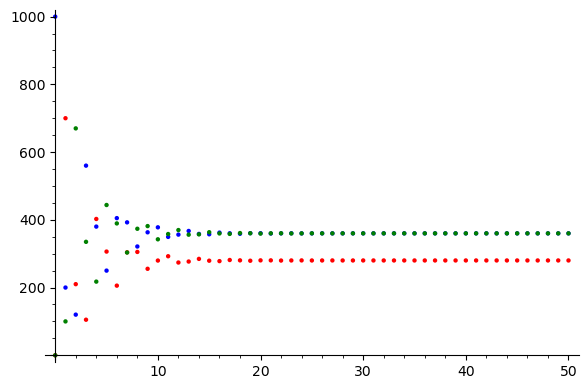

In [ ]:
DatIn=vector((1000,0,0)) # Empezamos solo con árboles pequeños (1000). La proporción asintótica de árboles en cada clase no depende del dato inicial 
v=DatIn
P,M,G=[(0,v[0])],[(0,v[1])],[(0,v[2])]
for i in [1..50]:
    v=A*v
    P=P+[(i,v[0])]
    M=M+[(i,v[1])]
    G=G+[(i,v[2])]
show(points(P,color='blue')+points(M,color='red')+points(G,color='green'))

In [37]:
# Proporciones "asintóticas" experimentales:
suma=P[-1][1]+M[-1][1]+G[-1][1]
PropAsExp=vector([P[-1][1]/suma, M[-1][1]/suma, G[-1][1]/suma])
PropAsExp.n()

(0.359999986456503, 0.280000017029373, 0.359999996514124)

In [38]:
# Comparamos las proporciones con las teóricas

(AutoVector1-PropAsExp).n()

(1.35434967774017e-8, -1.70293728629645e-8, 3.48587608556272e-9)

**b)** Por consideraciones de tipo paisajístico, se desea que a largo plazo el porcentaje de árboles grandes sea del 50%. Calcula el porcentaje de tala exacto para cumplir este objetivo.

_Sugerencia:_ Utilizar una matriz con una variable en las posiciones adecuadas. Para conseguir resultados exactos, conviene escribir los datos numéricos de la matriz en notación racional e indicar que se trabaja en el anillo simbólico $\texttt{SR}$.

In [39]:
# Intentamos ajustar la tala para que la distribución asintótica pase del 36% al 50% de árboles grandes.
# La información sobre la tala está en la tercera columna de la matriz de transición.
# Sustituimos está por el vector (t,0,1-t), con t el porcentaje (>0) de tala de árboles grandes.
var('t')
A=matrix(3,[[2/10,0,t],[7/10,1/10,0],[1/10,9/10,1-t]]) # Notación racional (puedes poner el anillo simbólico SR, pero no hace falta)
show(A)
es_regular(A)

[   1/5      0      t]
[  7/10   1/10      0]
[  1/10   9/10 -t + 1]

True

In [40]:
# Obtengo el autovector normalizado asociado al autovalor 1. Como veremos, depende de t.

AutoVector1=vector((A-identity_matrix(3)).right_kernel().basis()[0]) # Obtenemos un vector propio asociado al autovalor 1
AutoVector1=AutoVector1/sum(AutoVector1)                             # Lo normalizamos  
show(AutoVector1)

(45/4/(9/t + 20), 35/4/(9/t + 20), 9/(t*(9/t + 20)))

In [41]:
#Calculo cuánto debe valer t para que la tercera componente del autovector normalizado asociado al autovalor 1 sea 0.5 (el 50%)

solve(AutoVector1[2]==0.5, t)

[t == (9/20)]

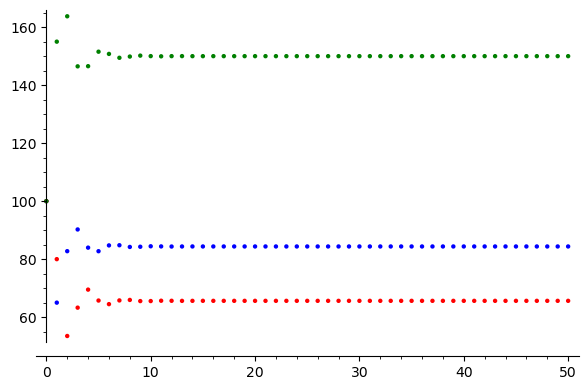

In [42]:
# Compruebo experimentalmente que con esta tasa de tala asintóticamente tenemos la proporción de árboles grandes deseada

t0=solve(AutoVector1[2]==0.5, t)[0].rhs()
A0=A.substitute(t=t0)
#show(A0)
v=vector([100,100,100])
P,M,G=[(0,v[0])],[(0,v[1])],[(0,v[2])]
for i in [1..50]:
    v=A0*v
    P=P+[(i,v[0])]
    M=M+[(i,v[1])]
    G=G+[(i,v[2])]
show(points(P,color='blue')+points(M,color='red')+points(G,color='green'))

In [43]:
#veamos si tras esos pasos los grandes son en efecto un 50%
# Proporciones "asintóticas" experimentales:
suma=P[-1][1]+M[-1][1]+G[-1][1]
PropAsExp=vector([P[-1][1]/suma, M[-1][1]/suma, G[-1][1]/suma])
PropAsExp.n()

(0.281250000000001, 0.218749999999994, 0.500000000000004)